In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [5]:
pwd

'/content'

In [6]:
result_Y = np.load("./drive/MyDrive/Tutoring/SmartZoo/duck_Y_sequence.npy")
result_X = np.load("./drive/MyDrive/Tutoring/SmartZoo/duck_X_sequence.npy")

# 01 Plotting

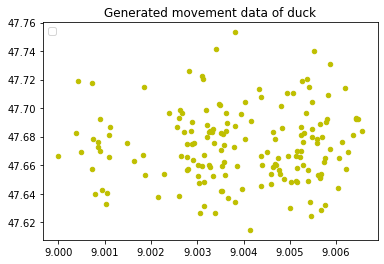

In [7]:
# Plot
plt.scatter(result_X, result_Y, s=20, c='y', marker='o')
plt.title('Generated movement data of duck')
plt.legend(loc=2)
plt.show()

# 02 Clustering

## 2-1 Real data vs. Generated data

In [9]:
rawdata = pd.read_csv("./drive/MyDrive/Tutoring/SmartZoo/Lake_Constance_Ducks_XY.csv", encoding='CP949') # if you want to use another animal data, you can change this line

real = rawdata.dropna().to_numpy()
generated = np.c_[result_X, result_Y]

In [ ]:
real.shape

(1283, 2)

In [ ]:
generated.shape

(168, 2)

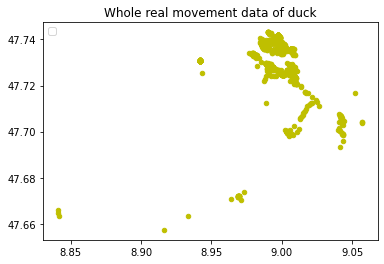

In [10]:
# Plot
plt.scatter(real[:, 0], real[:, 1], s=20, c='y', marker='o')
plt.title('Whole real movement data of duck')
plt.legend(loc=2)
plt.show()

In [11]:
# sample real data (sampling number = generated data)
#real_sampled = real[np.random.choice(real.shape[0], generated.shape[0], replace=False), :]
real_sampled = real[0:168,:]

In [12]:
real_sampled.shape

(168, 2)

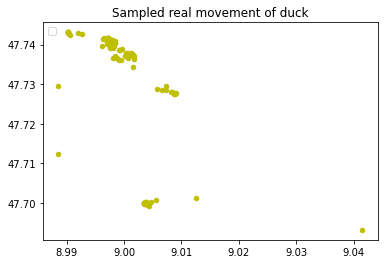

In [13]:
# Plot
plt.scatter(real_sampled[:, 0], real_sampled[:, 1], s=20, c='y', marker='o')
plt.title('Sampled real movement of duck')
plt.legend(loc=2)
plt.show()

In [14]:
data_sampled = np.concatenate((real_sampled, generated), axis = 0)

In [15]:
data_sampled.shape

(336, 2)

In [16]:
data_sampled

array([[ 9.0072949 , 47.7294357 ],
       [ 9.0066641 , 47.7286278 ],
       [ 9.0072859 , 47.7285377 ],
       [ 9.0058106 , 47.7286649 ],
       [ 9.0082572 , 47.7281318 ],
       [ 9.0087946 , 47.7275323 ],
       [ 9.0088171 , 47.727551  ],
       [ 9.0088085 , 47.7276485 ],
       [ 9.0090854 , 47.727876  ],
       [ 9.0083572 , 47.7279891 ],
       [ 9.0083699 , 47.7279443 ],
       [ 9.0016083 , 47.7344255 ],
       [ 8.9971944 , 47.7416331 ],
       [ 8.997209  , 47.7416753 ],
       [ 8.9971585 , 47.7416124 ],
       [ 8.9972095 , 47.741613  ],
       [ 8.9972277 , 47.7416072 ],
       [ 8.9966394 , 47.7415019 ],
       [ 8.9962635 , 47.741304  ],
       [ 8.9974336 , 47.7411524 ],
       [ 8.9981198 , 47.7409102 ],
       [ 8.9981074 , 47.7390923 ],
       [ 8.999055  , 47.738599  ],
       [ 8.9975994 , 47.7411631 ],
       [ 8.9984125 , 47.7409678 ],
       [ 8.9984587 , 47.7404325 ],
       [ 8.9984806 , 47.7404403 ],
       [ 8.9981262 , 47.7406767 ],
       [ 8.9964687 ,

In [17]:
# scaling
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_sampled.reshape(-1,1)).reshape(-1,2)
# data_scaled_X = min_max_scaler.fit_transform(data_sampled[:,0].reshape(-1,1))
# data_scaled_Y = min_max_scaler.fit_transform(data_sampled[:,1].reshape(-1,1))
# data_scaled = np.c_[data_scaled_X, data_scaled_Y]

In [18]:
data_scaled

array([[4.84515228e-04, 9.99385963e-01],
       [4.68242702e-04, 9.99365122e-01],
       [4.84283058e-04, 9.99362798e-01],
       [4.46225263e-04, 9.99366079e-01],
       [5.09339343e-04, 9.99352327e-01],
       [5.23202462e-04, 9.99336862e-01],
       [5.23782886e-04, 9.99337344e-01],
       [5.23561035e-04, 9.99339859e-01],
       [5.30704127e-04, 9.99345728e-01],
       [5.11919008e-04, 9.99348646e-01],
       [5.12246625e-04, 9.99347490e-01],
       [3.37820008e-04, 9.99514683e-01],
       [2.23956182e-04, 9.99700615e-01],
       [2.24332813e-04, 9.99701704e-01],
       [2.23030082e-04, 9.99700081e-01],
       [2.24345711e-04, 9.99700096e-01],
       [2.24815210e-04, 9.99699947e-01],
       [2.09639042e-04, 9.99697230e-01],
       [1.99942082e-04, 9.99692125e-01],
       [2.30126740e-04, 9.99688215e-01],
       [2.47828400e-04, 9.99681967e-01],
       [2.47508522e-04, 9.99635071e-01],
       [2.71953426e-04, 9.99622345e-01],
       [2.34403824e-04, 9.99688491e-01],
       [2.553790

In [19]:
## color setting
# you should change i to change 'k' in k mean clustering
i = 0 # i = 0 for k = 2
color_num = i+2

colors = plt.cm.tab10(np.arange(color_num, dtype=int)) #matplotlib colormap google it!

## K mean clustering
model=KMeans(init="random", n_clusters=i+2 ,n_init=10,max_iter=300,random_state=42)
cluster_labels=model.fit_predict(data_scaled)

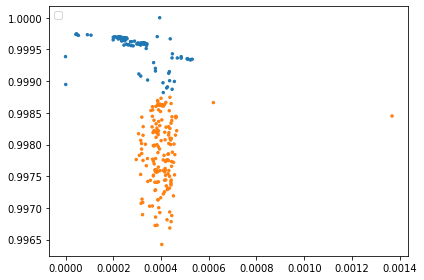

In [20]:
plt.figure(figsize=(6, 4))

# scatter plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=6, color=colors[cluster_labels])
plt.legend(loc=2)
plt.tight_layout()

In [ ]:
real_labels = np.r_[np.repeat(1, real_sampled.shape[0]), np.repeat(0, generated.shape[0])] # real data for label 1

In [ ]:
real_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
count = 0
for i in zip(real_labels, cluster_labels):
  if i[0] == i[1]:
    count+=1
  else:
    pass
print('Accuracy of distinguishing real data and generated data is:', count/real_labels.shape[0])

Accuracy of distinguishing real data and generated data is: 0.20535714285714285


## 2-2 Random data vs. Generated data

In [55]:
## y : 0;996 ~ 1
## x : 0.003 ~ 0.005
x = []
y = []
while len(x) < 168:
  r = np.random.rand(1)[0]
  if 0<r<0.000175:
    x.append(r)
while len(y) < 168:
  r = np.random.rand(1)[0]
  if 0.996<r<1:
    y.append(r)

In [56]:
random_seq = np.concatenate([np.array(x).reshape(-1, 1), np.array(y). reshape(-1, 1)], axis=1)

In [36]:
random_seq.shape

(168, 2)

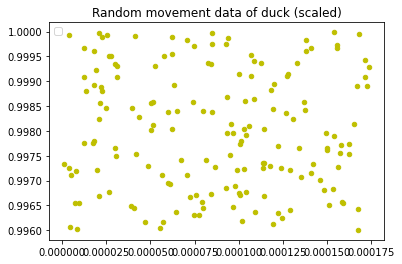

In [66]:
# Plot
plt.scatter(random_seq[:, 0], random_seq[:, 1], s=20, c='y', marker='o')
plt.title('Random movement data of duck (scaled)')
plt.legend(loc=2)
plt.show()

In [39]:
generated = np.c_[result_X, result_Y]

In [40]:
# generated_scaled_X = min_max_scaler.fit_transform(generated[:,0].reshape(-1,1))
# generated_scaled_Y = min_max_scaler.fit_transform(generated[:,1].reshape(-1,1))
# generated_scaled = np.c_[generated_scaled_X, generated_scaled_Y]

generated_scaled = min_max_scaler.fit_transform(generated.reshape(-1,1)).reshape(-1,2)

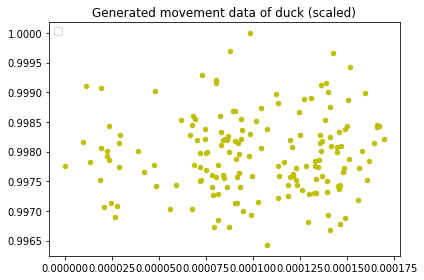

In [41]:
# Plot
plt.scatter(generated_scaled[:, 0], generated_scaled[:, 1], s=20, c='y', marker='o')
plt.title('Generated movement data of duck (scaled)')
plt.legend(loc=2)
plt.tight_layout()
plt.show()

In [57]:
data_scaled = np.concatenate((random_seq, generated_scaled), axis = 0)

In [58]:
data_scaled

array([[8.13523824e-05, 9.97408120e-01],
       [9.40748423e-05, 9.99869967e-01],
       [1.57689901e-04, 9.97720527e-01],
       [1.37934160e-04, 9.99827428e-01],
       [7.52318053e-06, 9.96541018e-01],
       [1.28169436e-04, 9.99154810e-01],
       [1.01506721e-04, 9.97803104e-01],
       [1.37306710e-04, 9.98417294e-01],
       [5.11743278e-05, 9.98581988e-01],
       [1.35137222e-04, 9.97075024e-01],
       [9.32473388e-05, 9.97954877e-01],
       [1.03838065e-04, 9.97927880e-01],
       [1.03578913e-04, 9.98611410e-01],
       [9.33451638e-05, 9.98679868e-01],
       [1.49702754e-04, 9.97616516e-01],
       [1.12612725e-04, 9.99365034e-01],
       [8.09426444e-06, 9.97198714e-01],
       [7.56568150e-05, 9.96716648e-01],
       [9.28521176e-05, 9.96847346e-01],
       [6.11942157e-05, 9.96941167e-01],
       [1.71546285e-04, 9.99085993e-01],
       [1.28186989e-06, 9.97325621e-01],
       [8.25297054e-06, 9.96021826e-01],
       [1.54179807e-04, 9.99987258e-01],
       [9.650804

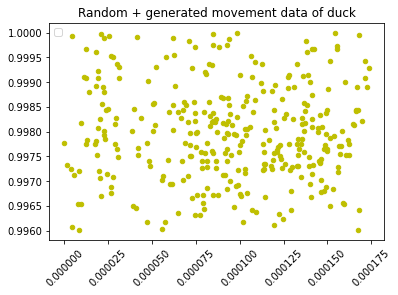

In [67]:
# Plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=20, c='y', marker='o')
plt.xticks(rotation=45)
plt.title('Random + generated movement data of duck')
plt.legend(loc=2)
plt.show()

In [60]:
## color setting
# you should change i to change 'k' in k mean clustering
i = 0 # i = 0 for k = 2
color_num = i+2

colors = plt.cm.tab10(np.arange(color_num, dtype=int))

## K mean clustering
model=KMeans(init="random", n_clusters=i+2 ,n_init=10,max_iter=300,random_state=42)
cluster_labels=model.fit_predict(data_scaled)

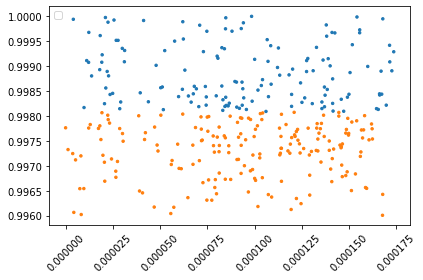

In [68]:
plt.figure(figsize=(6, 4))

# scatter plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=6, color=colors[cluster_labels])
plt.xticks(rotation=45)
plt.legend(loc=2)
plt.tight_layout()

In [62]:
real_labels = np.r_[np.repeat(1, random_seq.shape[0]), np.repeat(0, generated.shape[0])]

In [63]:
real_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
cluster_labels

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [65]:
count = 0
for i in zip(real_labels, cluster_labels):
  if i[0] == i[1]:
    count+=1
  else:
    pass
print('Accuracy of distinguishing of random data and generated data is:', count/real_labels.shape[0])

Accuracy of distinguishing of random data and generated data is: 0.4732142857142857
